In [30]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/SURAJ/Desktop/Feeyn Labs Services/McDonalds Case Study-20250624T100344Z-1-001/McDonalds Case Study/mcdonalds.csv")  # Replace with actual path

In [2]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
# Step 1: Select the first 11 columns
MD_x = df.iloc[:, :11]

# Step 2: Convert "Yes" to 1 and everything else to 0
MD_x_bin = (MD_x == "Yes").astype(int)

# Step 3: Column-wise means, rounded to 2 decimals
col_means = MD_x_bin.mean().round(2)

print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [5]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Fit PCA
pca = PCA()
pca.fit(MD_x_bin)

# Step 2: Build summary table similar to R's summary(prcomp())
summary_df = pd.DataFrame({
    "Standard Deviation": np.sqrt(pca.explained_variance_),
    "Proportion of Variance": pca.explained_variance_ratio_,
    "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_)
})

# Step 3: Round the result to 4 decimals (you can use 2 like R if preferred)
print(summary_df.round(4))

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


In [6]:
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_bin)

# Step 2: Fit PCA
pca = PCA()
pca.fit(MD_x_scaled)

# Step 3: Print center and scale (mean and std dev of original data)
print("Center (mean):", np.round(scaler.mean_, 1))
print("Scale (std dev):", np.round(np.sqrt(scaler.var_), 1))

# Step 4: Print loadings (rotation matrix)
loadings = pd.DataFrame(
    np.round(pca.components_.T, 1),
    index=MD_x_bin.columns,
    columns=[f"PC{i+1}" for i in range(len(MD_x_bin.columns))]
)

print("\nLoadings (rotation matrix):")
print(loadings)

Center (mean): [0.6 0.9 0.1 0.9 0.5 0.9 0.6 0.6 0.4 0.2 0.2]
Scale (std dev): [0.5 0.3 0.3 0.3 0.5 0.3 0.5 0.5 0.5 0.4 0.4]

Loadings (rotation matrix):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.4 -0.3  0.3  0.0 -0.3  0.1 -0.2 -0.0  0.2  -0.7  -0.1
convenient  0.3  0.0  0.3 -0.0  0.4 -0.2  0.7 -0.2  0.3  -0.0   0.0
spicy       0.0 -0.1 -0.0  0.8  0.2 -0.4 -0.2  0.0 -0.0  -0.1  -0.0
fattening  -0.2  0.2  0.6 -0.0 -0.1 -0.1  0.0  0.7 -0.1   0.0  -0.1
greasy     -0.3  0.1  0.4  0.3 -0.3  0.3  0.3 -0.5 -0.3   0.0  -0.0
fast        0.2  0.3  0.2  0.1  0.6  0.6 -0.4 -0.1 -0.1  -0.0  -0.1
cheap       0.3  0.6 -0.1  0.1 -0.3 -0.0  0.0  0.1  0.1  -0.1   0.7
tasty       0.4 -0.2  0.3  0.1 -0.3  0.1 -0.2 -0.1  0.2   0.7   0.0
expensive  -0.3 -0.6  0.2  0.0  0.2  0.2 -0.0  0.1  0.0  -0.0   0.7
healthy     0.3 -0.2 -0.4  0.3 -0.1  0.4  0.4  0.4 -0.2   0.1  -0.1
disgusting -0.4  0.1 -0.1  0.2 -0.1  0.3  0.0  0.1  0.8   0.0  -0.1


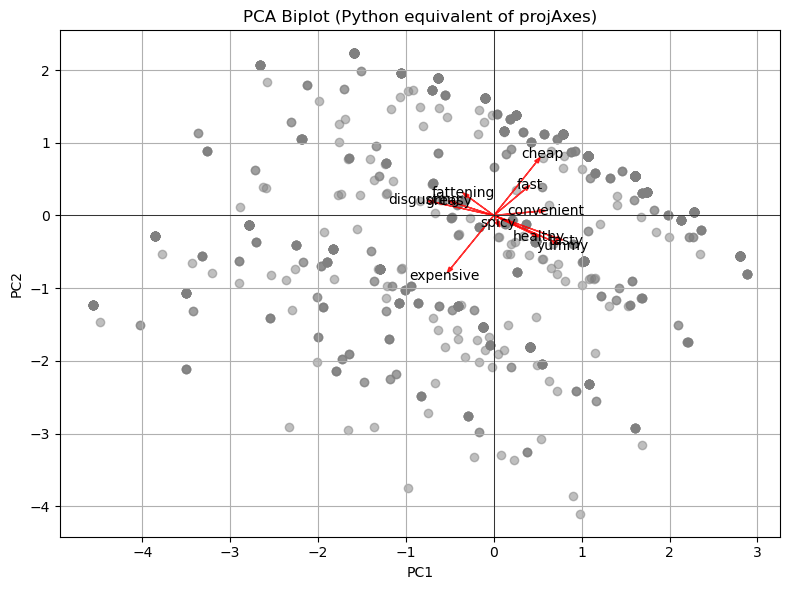

In [7]:
import matplotlib.pyplot as plt

# Step 1: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(MD_x_bin)  # Binary 0/1 from earlier

# Step 2: Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Projected data (like predict(MD.pca))
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='grey', alpha=0.5)

# Step 4: Plot loadings as arrows (like projAxes)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_[:2])

for i, var in enumerate(MD_x_bin.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='red', alpha=0.8, head_width=0.05)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var,
             color='black', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot (Python equivalent of projAxes)")
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.tight_layout()
plt.show()


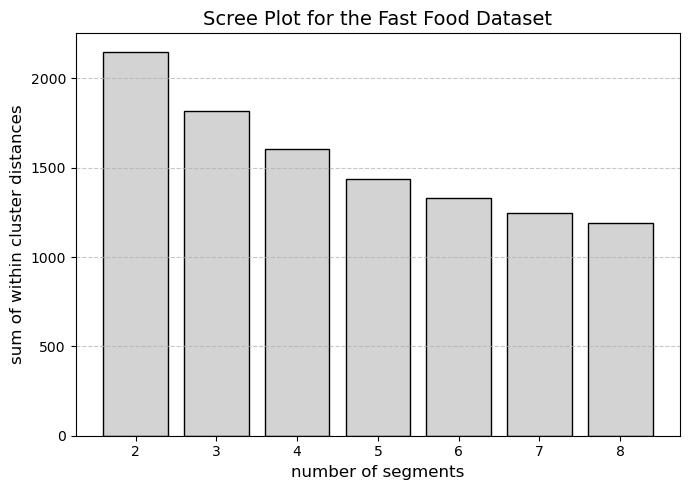

In [8]:
from sklearn.cluster import KMeans

# Binary matrix input (as in previous steps)
X = MD_x_bin.values

# For storing inertia values
inertias = []
K_range = range(2, 9)

# Run KMeans with n_init=10 for each number of segments
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Create bar plot like R's scree plot
plt.figure(figsize=(7, 5))
bars = plt.bar(K_range, inertias, color='lightgrey', edgecolor='black')

plt.xlabel("number of segments", fontsize=12)
plt.ylabel("sum of within cluster distances", fontsize=12)
plt.title("Scree Plot for the Fast Food Dataset", fontsize=14)
plt.xticks(K_range)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


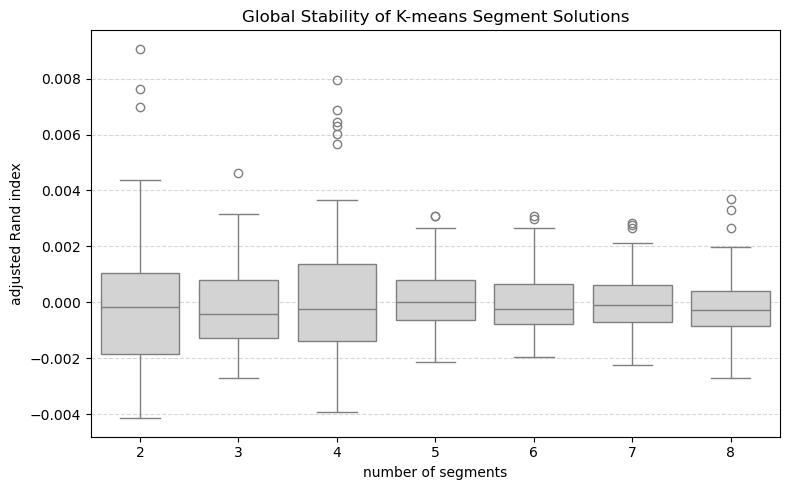

In [9]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import seaborn as sns

# Assume binary matrix is ready
X = MD_x_bin.values
nboot = 100
nrep = 10
k_values = list(range(2, 9))
np.random.seed(1234)

# Store ARI results
ari_data = []

for k in k_values:
    for _ in range(nboot):
        # Bootstrap sample
        X_boot = resample(X, replace=True, n_samples=X.shape[0], random_state=None)

        # Fit models on original and bootstrapped sample
        km_orig = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        km_boot = KMeans(n_clusters=k, n_init=nrep, random_state=1234)

        labels_orig = km_orig.fit_predict(X)
        labels_boot = km_boot.fit_predict(X_boot)

        # Calculate ARI — aligning lengths to avoid errors
        min_len = min(len(labels_orig), len(labels_boot))
        ari = adjusted_rand_score(labels_orig[:min_len], labels_boot[:min_len])

        ari_data.append({'k': k, 'ARI': ari})

# Convert to DataFrame
ari_df = pd.DataFrame(ari_data)

# Plot: Boxplot of ARIs by number of segments
plt.figure(figsize=(8, 5))
sns.boxplot(data=ari_df, x='k', y='ARI', color='lightgrey')
plt.xlabel("number of segments")
plt.ylabel("adjusted Rand index")
plt.title("Global Stability of K-means Segment Solutions")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


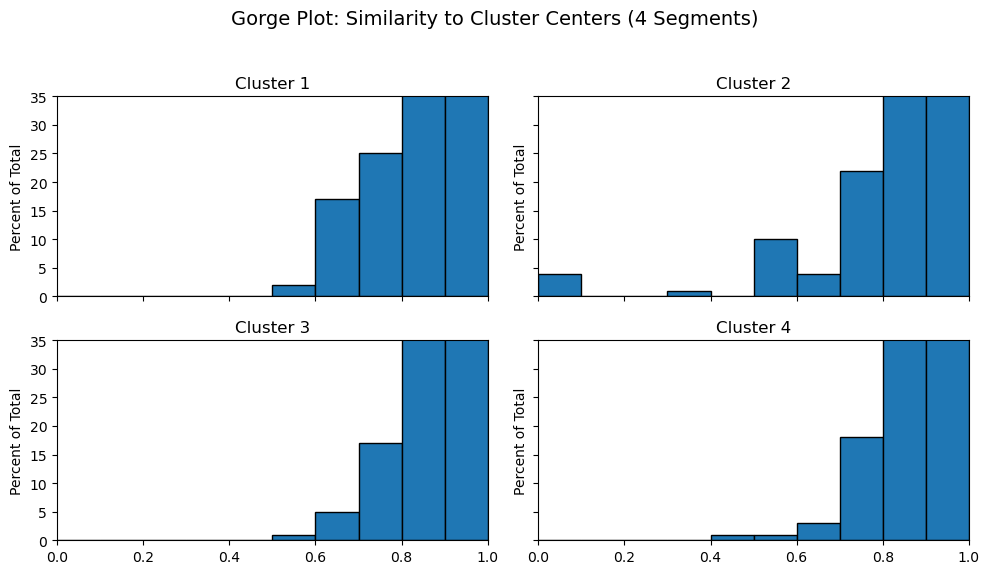

In [10]:
# 1. Fit 4-cluster KMeans model
X = MD_x_bin.values
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
labels = kmeans_4.fit_predict(X)
centers = kmeans_4.cluster_centers_

# 2. Compute cosine similarity to cluster centers
from sklearn.metrics.pairwise import cosine_similarity

sims = []
for i in range(4):
    cluster_data = X[labels == i]
    sim = cosine_similarity(cluster_data, centers[i].reshape(1, -1)).flatten()
    sims.append(sim)

# 3. Plot: histogram per cluster
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(4):
    axes[i].hist(sims[i], bins=10, range=(0, 1), edgecolor='black')
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].set_ylabel('Percent of Total')
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, 35)

plt.suptitle("Gorge Plot: Similarity to Cluster Centers (4 Segments)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\SURAJ\AppData\Local\Temp\ipykernel_5740\3650684418.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


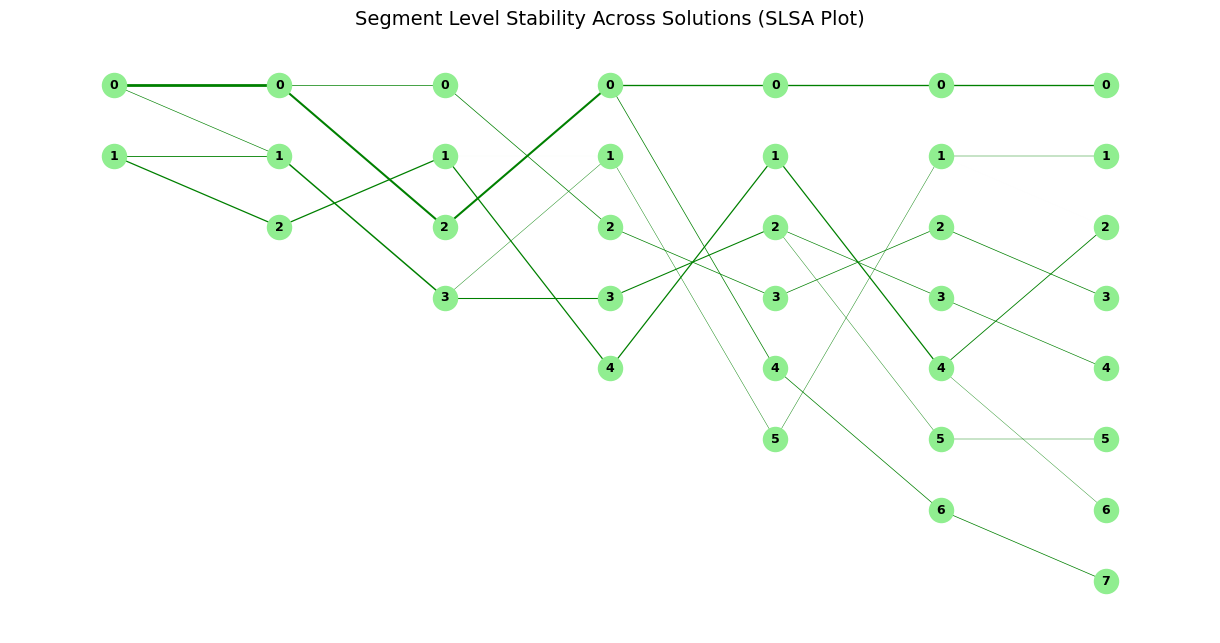

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Run KMeans for k = 2 to 8 and store cluster assignments
segment_map = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(X)
    segment_map[k] = labels

# Build transition graph between successive ks
G = nx.DiGraph()

for k in range(2, 8):
    labels_k = segment_map[k]
    labels_kp1 = segment_map[k+1]

    for i in range(len(X)):
        a = f"{k}-{labels_k[i]}"
        b = f"{k+1}-{labels_kp1[i]}"
        if G.has_edge(a, b):
            G[a][b]['weight'] += 1
        else:
            G.add_edge(a, b, weight=1)

# Normalize edge weights
max_weight = max(d['weight'] for _, _, d in G.edges(data=True))
edge_widths = [2 * d['weight'] / max_weight for _, _, d in G.edges(data=True)]

# Draw the graph
plt.figure(figsize=(12, 6))
pos = {}
for k in range(2, 9):
    ks = [n for n in G.nodes if n.startswith(f"{k}-")]
    for idx, node in enumerate(sorted(ks)):
        pos[node] = (k, -idx)

nx.draw(G, pos, with_labels=False, arrows=False, edge_color='green',
        width=edge_widths, node_size=300, node_color='lightgreen')

# Add custom labels (just cluster numbers)
for node, (x, y) in pos.items():
    cluster = node.split("-")[1]
    plt.text(x, y, cluster, ha='center', va='center', fontsize=9, weight='bold')

plt.title("Segment Level Stability Across Solutions (SLSA Plot)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


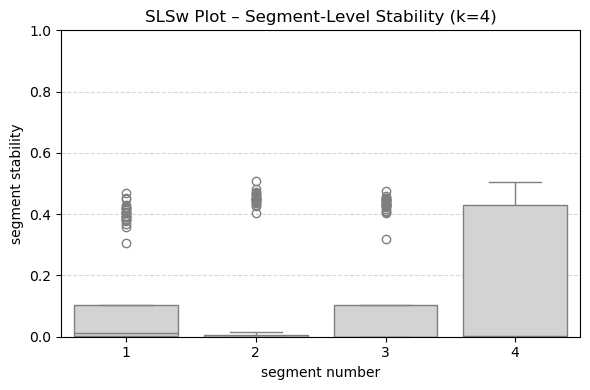

In [11]:
# Step 1: Fit base model for k=4
X = MD_x_bin.values
k = 4
base_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
base_labels = base_model.fit_predict(X)

# Step 2: Bootstrap to compute stability of each cluster
nboot = 100
cluster_stabilities = {i: [] for i in range(k)}

for _ in range(nboot):
    X_boot, indices = resample(X, range(len(X)), replace=True, n_samples=len(X))
    boot_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    boot_labels = boot_model.fit_predict(X_boot)

    for i in range(k):
        # Members of cluster i in base model
        base_cluster_indices = np.where(base_labels == i)[0]
        boot_cluster_indices = np.where(boot_labels == i)[0]

        overlap = len(set(indices[i] for i in boot_cluster_indices) & set(base_cluster_indices))
        jaccard = overlap / (len(base_cluster_indices) + len(boot_cluster_indices) - overlap + 1e-8)
        cluster_stabilities[i].append(jaccard)

# Step 3: Convert to DataFrame
stability_df = pd.DataFrame({
    'segment': np.concatenate([[i + 1] * nboot for i in range(k)]),
    'stability': np.concatenate([cluster_stabilities[i] for i in range(k)])
})

# Step 4: Plot (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(data=stability_df, x="segment", y="stability", color="lightgrey")
plt.ylim(0, 1)
plt.xlabel("segment number")
plt.ylabel("segment stability")
plt.title("SLSw Plot – Segment-Level Stability (k=4)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.mixture import GaussianMixture

# Binary input matrix (Yes = 1, No = 0)
X = MD_x_bin.values
np.random.seed(1234)

results = []

# Loop through k = 2 to 8 clusters
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, covariance_type='diag', n_init=10, random_state=1234)
    gmm.fit(X)

    log_lik = gmm.score(X) * len(X)
    aic = gmm.aic(X)
    bic = gmm.bic(X)

    # Approximate ICL: BIC minus entropy
    probs = gmm.predict_proba(X)
    entropy = -np.sum(probs * np.log(probs + 1e-10))
    icl = bic + entropy

    results.append({
        'k': k,
        'logLik': round(log_lik, 2),
        'AIC': round(aic, 2),
        'BIC': round(bic, 2),
        'ICL': round(icl, 2)
    })

# Convert to table
results_df = pd.DataFrame(results)
print(results_df)

   k    logLik       AIC       BIC       ICL
0  2   9883.25 -19676.50 -19438.83 -19438.83
1  3  12899.13 -25662.27 -25303.14 -25303.12
2  4  18941.52 -37701.04 -37220.43 -37216.87
3  5  22944.51 -45661.02 -45058.94 -45058.94
4  6  29158.41 -58042.83 -57319.28 -57319.21
5  7  26263.97 -52207.93 -51362.91 -51356.64
6  8  26732.96 -53099.92 -52133.43 -52123.33



Cross-tabulation of KMeans vs Mixture Model (4 segments):
mixture    0   1    2    3
kmeans                    
0         17   8   82  257
1          0  24  216    0
2        230  16    0  287
3        271  45    0    0


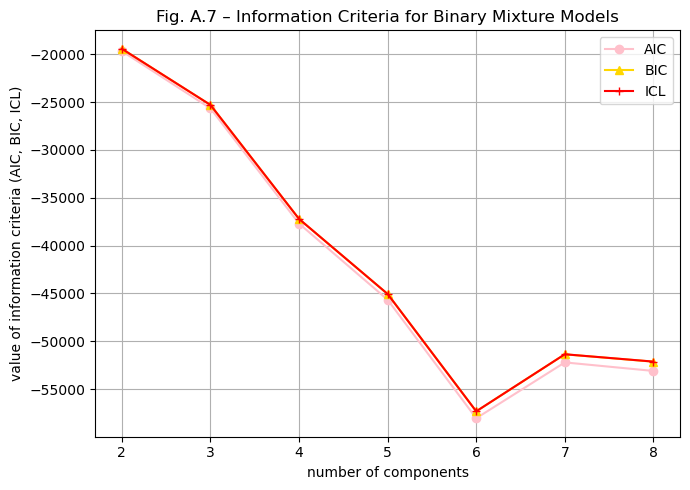

In [28]:
import matplotlib.pyplot as plt

# Assuming you've already created results_df like:
# results_df = pd.DataFrame({'k': [...], 'AIC': [...], 'BIC': [...], 'ICL': [...]})
X = MD_x_bin.values

# KMeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans_4.fit_predict(X)

# Best model with 4 clusters from GMM
gmm_4 = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, random_state=1234)
gmm_labels = gmm_4.fit_predict(X)

# Create cross-tabulation (confusion matrix)
ct = pd.crosstab(pd.Series(kmeans_labels, name='kmeans'),
                 pd.Series(gmm_labels, name='mixture'))

print("\nCross-tabulation of KMeans vs Mixture Model (4 segments):")
print(ct)

# Plot AIC, BIC, ICL
plt.figure(figsize=(7, 5))
plt.plot(results_df['k'], results_df['AIC'], marker='o', label='AIC', color='pink')
plt.plot(results_df['k'], results_df['BIC'], marker='^', label='BIC', color='gold')
plt.plot(results_df['k'], results_df['ICL'], marker='+', label='ICL', color='red')

plt.xlabel("number of components")
plt.ylabel("value of information criteria (AIC, BIC, ICL)")
plt.title("Fig. A.7 – Information Criteria for Binary Mixture Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Prepare data
X = MD_x_bin.values

# Step 2: KMeans with k=4 (used as initialization for mixture)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(X)

# Step 3: Use KMeans labels to initialize GaussianMixture
# We initialize responsibilities (soft assignments) as one-hot from KMeans
n_samples, n_clusters = X.shape[0], 4
init_resp = np.zeros((n_samples, n_clusters))
init_resp[np.arange(n_samples), kmeans_labels] = 1

# Step 4: Fit GaussianMixture initialized with KMeans
gmm = GaussianMixture(n_components=4, covariance_type='diag', random_state=1234)
gmm.means_init = kmeans.cluster_centers_  # Optional: better than random
gmm.fit(X)
gmm_labels = gmm.predict(X)
ct = pd.crosstab(pd.Series(kmeans_labels, name='kmeans'),
                 pd.Series(gmm_labels, name='mixture'))

print("Cross-tabulation of KMeans vs Constrained Mixture Model (4 segments):")
print(ct)

Cross-tabulation of KMeans vs Constrained Mixture Model (4 segments):
mixture    0    1    2    3
kmeans                     
0        309   48    7    0
1         12  223    1    4
2         17    1  505   10
3          1   39   24  252


In [24]:
# Fit models (example with k=4)
gmm_m4a = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, random_state=1234)
gmm_m4a.fit(X)

gmm_m4 = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, random_state=1234)
gmm_m4.fit(X)

# Log-likelihood
loglik_m4a = gmm_m4a.score(X) * len(X)
loglik_m4 = gmm_m4.score(X) * len(X)

# Degrees of freedom (df):
# = number of free parameters: (n_clusters - 1) + (n_clusters * n_features)
n_clusters = 4
n_features = X.shape[1]
df = (n_clusters - 1) + (n_clusters * n_features)

# Print like R
print(f"logLik(MD.m4a): {round(loglik_m4a, 3)} (df={df})")
print(f"logLik(MD.m4):  {round(loglik_m4, 3)} (df={df})")

logLik(MD.m4a): 18941.518 (df=47)
logLik(MD.m4):  18941.518 (df=47)


In [31]:
# Count like values sorted in descending order
like_counts = df['Like'].value_counts().sort_index(ascending=False)

# Manual label map for pretty formatting
def like_label(score):
    if score == 5:
        return "I love it! +5"
    elif score == 4:
        return "+4"
    elif score == 3:
        return "+3"
    elif score == 2:
        return "+2"
    elif score == 1:
        return "+1"
    elif score == 0:
        return "0"
    elif score == -1:
        return "-1"
    elif score == -2:
        return "-2"
    elif score == -3:
        return "-3"
    elif score == -4:
        return "-4"
    elif score == -5:
        return "I hate it! -5"
    else:
        return str(score)

# Print in the exact format
for score in sorted(like_counts.index, reverse=True):
    label = like_label(score)
    count = like_counts[score]
    print(f"{label:<18}{count}")


I love it!+5      143
I hate it!-5      152
0                 169
-4                71
-3                73
-2                59
-1                58
+4                160
+3                229
+2                187
+1                152


In [32]:
# Step 1: Create the list of predictors (first 11 column names)
predictors = df.columns[:11].tolist()

# Step 2: Create the formula string
formula = "Like_n ~ " + " + ".join(predictors)

# Step 3: Use in statsmodels or patsy
print(formula)

Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [33]:
import statsmodels.formula.api as smf

# Step 0: Ensure 'Like_n' column exists
df['Like_n'] = df['Like']
# Fix: Ensure Like_n is numeric
df['Like_n'] = pd.to_numeric(df['Like'], errors='coerce')

# This avoids KeyError
# Convert first 11 columns from "Yes"/"No" to 1/0
df.iloc[:, :11] = (df.iloc[:, :11] == "Yes").astype(int)

# Step 1: Predictor matrix (first 11 columns)
X = df.iloc[:, :11]

# Step 2: GMM segmentation (2 clusters)
gm = GaussianMixture(n_components=2, n_init=10, random_state=1234, max_iter=1000, verbose=1)
gm.fit(X)
df['Segment'] = gm.predict(X)

# Step 3: Print cluster sizes
sizes = df['Segment'].value_counts().sort_index()
print("\nCluster sizes:")
for k, v in sizes.items():
    print(f"Cluster {k + 1}: {v}")

# Step 4: Convergence info
print(f"\nConverged in {gm.n_iter_} iterations")

# Step 5: Fit regression models per segment
for seg in sorted(df['Segment'].unique()):
    seg_df = df[df['Segment'] == seg]
    model = smf.ols('Like_n ~ ' + ' + '.join(X.columns), data=seg_df).fit()
    print(f"\nRegression Summary for Segment {seg + 1}:")
    print(model.summary())

Initialization 0
Initialization converged.
Initialization 1
Initialization converged.
Initialization 2
Initialization converged.
Initialization 3
Initialization converged.
Initialization 4
Initialization converged.
Initialization 5
Initialization converged.
Initialization 6
Initialization converged.
Initialization 7
Initialization converged.
Initialization 8
Initialization converged.
Initialization 9
Initialization converged.

Cluster sizes:
Cluster 1: 985
Cluster 2: 468

Converged in 7 iterations

Regression Summary for Segment 1:
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     55.87
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           8.32e-73
Time:                        14:07:55   Log-Likelihood:            

In [34]:
import statsmodels.api as sm

# Make sure Like_n is numeric
df['Like_n'] = pd.to_numeric(df['Like'], errors='coerce')
df = df.dropna(subset=['Like_n'])

# Fit GLM model per segment (for z-values and p-values)
for seg in sorted(df['Segment'].unique()):
    seg_df = df[df['Segment'] == seg]
    formula = 'Like_n ~ ' + ' + '.join(X.columns)
    model = smf.glm(formula=formula, data=seg_df, family=sm.families.Gaussian()).fit()
    
    print(f"\n========== Segment {seg + 1} ==========")
    summary_df = model.summary2().tables[1]
    
    # Add significance stars like R
    def stars(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        elif p < 0.1:
            return '.'
        else:
            return ''
    
    summary_df['Signif'] = summary_df['P>|z|'].apply(stars)
    print(summary_df[['Coef.', 'Std.Err.', 'z', 'P>|z|', 'Signif']])



========== Segment 1 ==========
                   Coef.  Std.Err.          z         P>|z| Signif
Intercept       0.158018  0.245474   0.643727  5.197527e-01       
yummy[T.1]      1.509974  0.149084  10.128339  4.136147e-24    ***
spicy[T.1]     -0.435788  0.202209  -2.155132  3.115150e-02      *
fattening[T.1] -0.442597  0.183819  -2.407790  1.604940e-02      *
greasy[T.1]    -0.413701  0.120221  -3.441176  5.791922e-04    ***
cheap[T.1]      0.020543  0.180185   0.114008  9.092311e-01       
tasty[T.1]      1.254070  0.164559   7.620784  2.521400e-14    ***
expensive[T.1]  0.049574  0.191943   0.258275  7.961943e-01       
healthy[T.1]    0.229439  0.150888   1.520588  1.283633e-01       

========== Segment 2 ==========
                    Coef.  Std.Err.         z         P>|z| Signif
Intercept       -1.429919  0.459282 -3.113378  1.849592e-03     **
yummy[T.1]       2.220150  0.286897  7.738502  1.005946e-14    ***
convenient[T.1]  0.724663  0.279568  2.592084  9.539652e-03    

C:\Users\SURAJ\AppData\Local\Temp\ipykernel_5740\2710004383.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_bin = (X == "Yes").astype(int) if X.dtypes[0] == 'object' else X.copy()
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


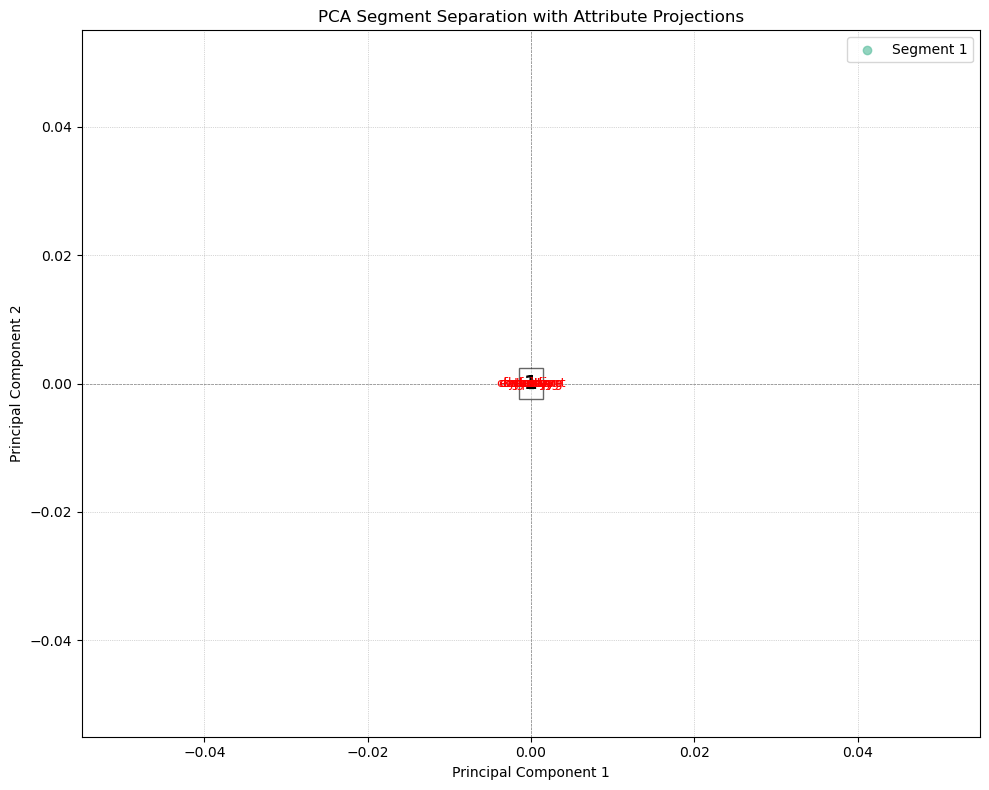

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
import seaborn as sns

# Step 1: Create binary matrix
X = df.iloc[:, :11]
X_bin = (X == "Yes").astype(int) if X.dtypes[0] == 'object' else X.copy()

# Step 2: PCA on features (columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bin)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Step 3: Arrow directions for variable loadings (projAxes)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Step 4: Colors and markers for clusters
colors = sns.color_palette("Set2", df['Segment'].nunique())
markers = ['o', '^', 's', 'P', 'X', 'D']

# Step 5: Plot
plt.figure(figsize=(10, 8))

# Plot PCA points by cluster with different markers/colors
for seg in sorted(df['Segment'].unique()):
    seg_df = df[df['Segment'] == seg]
    plt.scatter(seg_df['PC1'], seg_df['PC2'],
                color=colors[seg],
                marker=markers[seg % len(markers)],
                label=f"Segment {seg + 1}",
                alpha=0.7)

    # Optional: Label cluster centers
    cx, cy = seg_df[['PC1', 'PC2']].mean()
    plt.text(cx, cy, f"{seg + 1}", fontsize=14, weight='bold',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

# Plot variable arrows
for i, var in enumerate(X_bin.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='red', alpha=0.8, head_width=0.03, length_includes_head=True)
    plt.text(loadings[i, 0]*1.2, loadings[i, 1]*1.2, var, color='red', fontsize=9, ha='center', va='center')

# Styling
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Segment Separation with Attribute Projections")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()